# Claims inspection

In [17]:
import pandas as pd

In [81]:
df = pd.read_csv("approx-claims.csv")

df["label"].value_counts()

label
NC       683
POS      137
FACT      29
PROSP      7
NEG        5
Name: count, dtype: int64

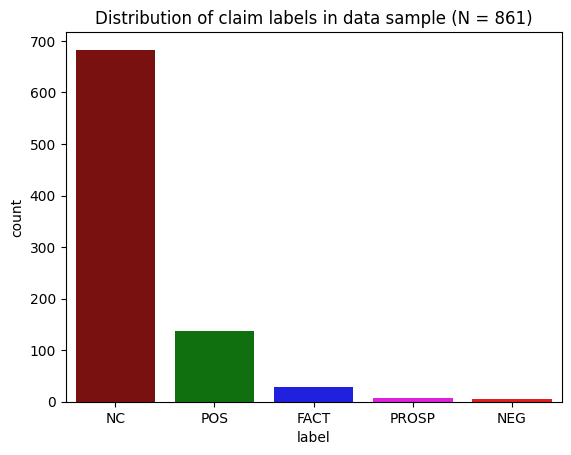

In [83]:
# all_claims = df[df["label"] != "NC"]
# print(all_claims["label"].value_counts())

import seaborn as sns


plot = sns.countplot(x="label", data=df, order=df["label"].value_counts().index, palette=["darkred", "green", "blue", "magenta", "red"])
plt.title(f"Distribution of claim labels in data sample (N = {df.shape[0]})")
plt.show()

In [19]:
art_ids = list(df["doccano_art_id"].unique())
claims = [all_claims[all_claims["doccano_art_id"] == idx] for idx in art_ids]

In [20]:
claims[4]

,doccano_art_id,sentence_id,text,label
242,4,0,This paper develops a Case/case-theoretic acco...,FACT
245,4,4,Given the asymmetry i n the size of ellipsis i...,POS
384,4,155,"Unlike Takita's analysis, we have argued that ...",POS
387,4,160,We suggest on the basis of the following do so...,POS
401,4,176,"In this paper, we first started with reviewing...",FACT
402,4,178,Departing from Kehler's (2000) insight that th...,POS
403,4,179,Given the different sizes of ellipsis interact...,POS
404,4,180,"Thus, the object element in the ellipsis claus...",POS
405,4,181,"Unlike structural Case, however, a difference ...",POS
406,4,182,"In addition, Case/case mismatch in the case of...",POS


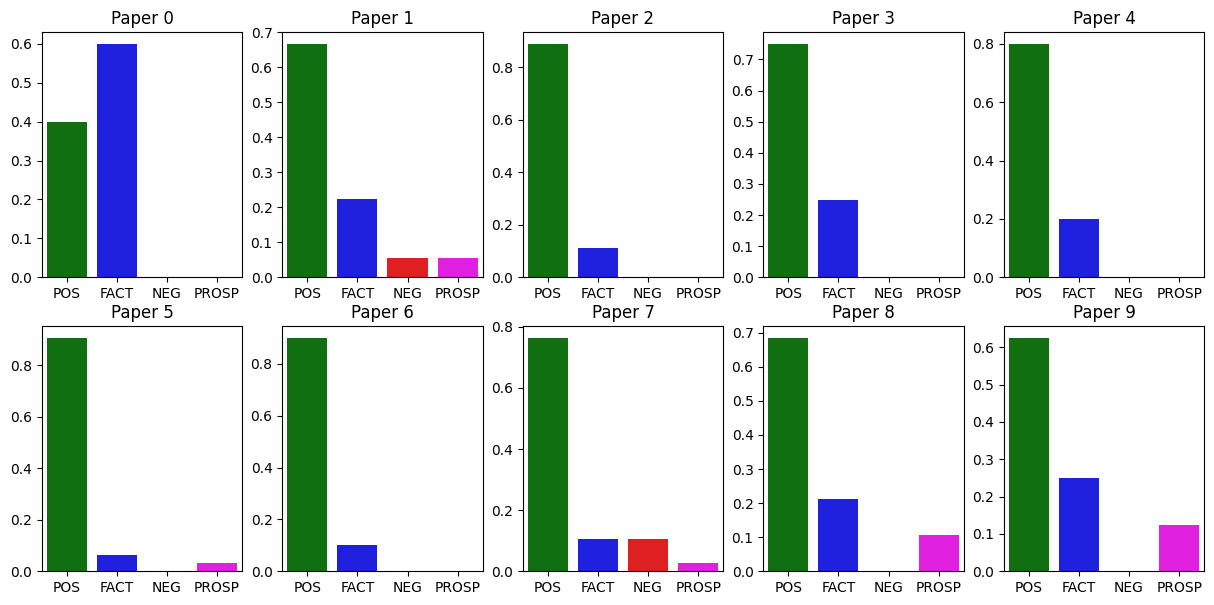

In [87]:
from matplotlib import pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# create a figure with subplots
fig, axs = plt.subplots(2, 5, figsize=(15, 7))
LABELS = ["POS", "FACT", "NEG", "PROSP"]

# for every article, we have a subplot with a barplot (count of labels)
for i, claim_df in enumerate(claims):
    ax = axs[i // 5, i % 5]
    total = len(claim_df)
    sns.barplot(x =LABELS, y=[len(claim_df[claim_df["label"] == l]) / total for l in LABELS], ax=ax, palette = ["green", "blue", "red", "magenta"])
    ax.set_title(f"Paper {art_ids[i]}")

# plt.title("Distribution of labels in sample papers", loc = "top")
plt.show()

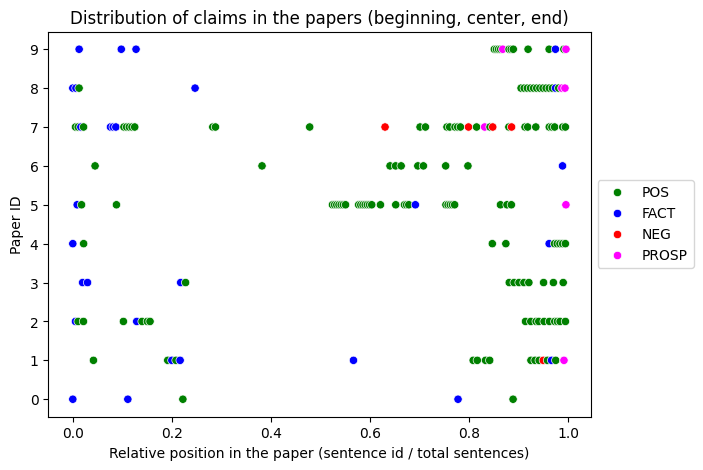

In [93]:
fig = plt.figure(figsize=(7, 5))

for i, claims_df in enumerate(claims):
    labels = claims_df["label"].values
    sent_ids = claims_df["sentence_id"].values
    
    n_total_sents = sent_ids[-1] + 1

    norm_sent_ids = [i / n_total_sents for i in sent_ids]
    if i == 1:
        legend = True
    else:
        legend = False
    sns.scatterplot(x=norm_sent_ids, y=i, hue=labels, palette={"POS": "green", "FACT":"blue", "NEG": "red", "PROSP": "magenta"}, legend=legend, )
    plt.xlabel("Relative position in the paper (sentence id / total sentences)")
    plt.ylabel("Paper ID")
    plt.yticks(range(len(claims)), art_ids)

# add a legend 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Distribution of claims in the papers (beginning, center, end)")
plt.show()


In [88]:
for s in claims[5].text.values:
    print(s)
    print()

In this paper, we propose a self-regulated learning approach by utilizing a generative adversarial network to generate spurious features.

Detailed experiments on the ACE 2005 and TAC-KBP 2015 corpora show that our proposed method is highly effective and adaptable.

Detailed experiments on event detection show that our proposed method achieves a substantial performance gain, and is capable of robust domain adaptation.

It can be observed that SELF outperforms other models, with a performance gain of no less than 1.1% F-score.

Frankly, the performance mainly benefits from the higher recall (78.8%).

But in fact the relatively comparable precision (75.3%) to the recall reinforces the advantages.

By contrast, although most of the compared models achieve much higher precision over SELF, they suffer greatly from the substantial gaps between precision and recall.

The advantage is offset by the greater loss of recall.

GAN plays an important role in optimizing Bi-RNN.

This is proven by th

In [6]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

#Compute embeddings
pos = claims[2]
pos = pos[pos["label"] == "POS"]
embeddings = model.encode(pos.text.values, convert_to_tensor=True)

c:\Users\cleme\Documents\STAGE\claims-in-NLP\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [33]:
for i, se1 in enumerate(embeddings):
    max_sim = 0
    most_sim = i
    for j, se2 in enumerate(embeddings):
        if i < j:
            sim = util.pytorch_cos_sim(se1, se2)
            if sim > max_sim:
                max_sim = sim
                most_sim = j
    print(pos.text.values[i])
    print(pos.text.values[most_sim])
    print(max_sim)
    print()

This graph is used to prune the action space, enabling more efficient exploration.
First, we show that a state representation in the form of a knowledge graph gives us the ability to effectively prune an action space.
tensor([[0.5855]])

In experiments using the TextWorld framework, we show that our proposed technique can learn a control policy faster than baseline alternatives.
Results show that incorporating a knowledge-graph into a reinforcement learning agent results in converges to the highest reward more than 40% faster than the best baseline.
tensor([[0.4569]])

First, we show that a state representation in the form of a knowledge graph gives us the ability to effectively prune an action space.
Action pruning using the knowledge graph and pre-training of the embeddings used in the deep Q-network result in shorter action sequences needed to complete quests.
tensor([[0.6352]])

We show how pre-training certain parts of our KG-DQN network using existing QA methods improves performa

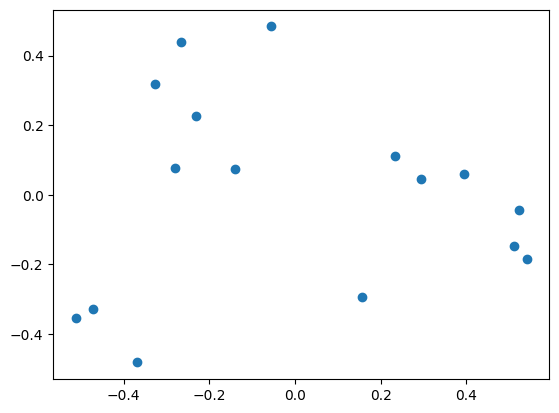

In [7]:
from sklearn.decomposition import PCA

# perform PCA on our embeddings for visualization
pca = PCA(n_components=2)
pca_embeddings = pca.fit_transform(embeddings)

import matplotlib.pyplot as plt

# plot the embeddings
plt.scatter(pca_embeddings[:, 0], pca_embeddings[:, 1])
plt.show()

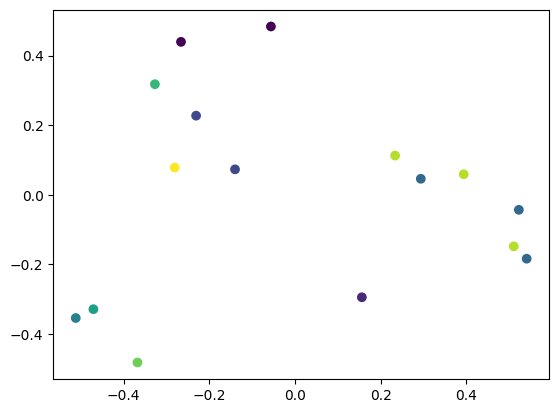

In [15]:
from sklearn.cluster import KMeans 

k = 10
km = KMeans(n_clusters = k)
km.fit(embeddings)

# get the cluster labels
cluster_labels = km.labels_

# plot the embeddings with the cluster labels
plt.scatter(pca_embeddings[:, 0], pca_embeddings[:, 1], c=cluster_labels)
plt.show()

In [16]:
# for each cluster, print the sentences
for i in range(k):
    print(f"Cluster {i}")
    for j, label in enumerate(cluster_labels):
        if label == i:
            print(pos.text.values[j])
            print()
    print()

Cluster 0
With pre-training using a questionanswering paradigm, we achieve this fast convergence rate while also achieving high quality quest solutions as measured by the number of steps required to complete the quests.

From these results, we conclude that the pre-training using our questionanswering paradigm is allowing the agent to find a general understanding of how to pick good actions even when the agent has never seen the final


Cluster 1
Since all versions of KG-DQN converge at approximately the same rate, we conclude that the knowledge graph-i.e., persistent memory-is the main factor helping convergence time since it is the common element across all experiments.


Cluster 2
We have shown that incorporating knowledge graphs into an deep Q-network can reduce training time for agents playing text-adventure games of various lengths.

Action pruning using the knowledge graph and pre-training of the embeddings used in the deep Q-network result in shorter action sequences needed to 

In [20]:
from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
for i, s1 in enumerate(claims[1].text.values):
    for j, s2 in enumerate(claims[1].text.values):
        if i < j:
            scores = scorer.score(s1, s2)
            if scores["rouge1"].fmeasure > 0.4:
                print(s1)
                print(s2)
                print(scores)
                print()

To prevent the problem of the reduction of coverage in the exact matching method, we also propose a partial matching method that keeps coverage just like standard triangulation by allowing connection of incompletely equivalent pivot subtrees.
From the results, we can see that the proposed partial matching method of pivot subtrees in triangulation outperforms the standard triangulation method for all language pairs and achieves higher or almost equal scores than proposed exact matching method.
{'rouge1': Score(precision=0.47368421052631576, recall=0.5, fmeasure=0.4864864864864865), 'rouge2': Score(precision=0.16216216216216217, recall=0.17142857142857143, fmeasure=0.16666666666666669), 'rougeL': Score(precision=0.23684210526315788, recall=0.25, fmeasure=0.24324324324324326)}

To prevent the problem of the reduction of coverage in the exact matching method, we also propose a partial matching method that keeps coverage just like standard triangulation by allowing connection of incompletel